In [1]:
import pandas as pd
import numpy as np


sddata = pd.read_csv('../csv/sandiego_data_by_zipcode.csv',index_col=0)
sddata = sddata.drop(columns='Date Retrieved').fillna(0)
sddata.tail()

sddata.sort_values(sddata.index[-1],axis=1,ascending=False,inplace=True)
sddiff = sddata.diff()
sddiff

,TOTAL,92154,91911,91950,91910,92173,92113,92020,92114,92021,...,92059,92091,92134,91916,92066,92055,92061,92070,92145,91906
Data through,,,,,,,,,,,,,,,,,,,,,
2020-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-01,117.0,3.0,3.0,1.0,4.0,2.0,2.0,3.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2020-04-02,146.0,2.0,5.0,6.0,2.0,1.0,5.0,9.0,7.0,10.0,...,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
2020-04-03,97.0,3.0,3.0,1.0,5.0,4.0,3.0,5.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-04-04,117.0,3.0,2.0,1.0,0.0,1.0,3.0,3.0,0.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-29,145.0,9.0,10.0,4.0,11.0,2.0,11.0,4.0,10.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-30,96.0,8.0,1.0,3.0,7.0,2.0,8.0,1.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-05-31,73.0,11.0,5.0,5.0,4.0,3.0,3.0,1.0,2.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
def average_new_cases_per_day(df,end_date,period):
    '''Return series with average number of new cases per day
    
    Inputs:
        df -- the Data Frame
        end_date -- last date of window
        period -- period in days of window
        
    Returns:
        avg_cases_per_day -- pandas Series
        
    '''
    start_date = (pd.Timestamp(end_date)-pd.Timedelta('{} days'.format(period-1))).strftime('%Y-%m-%d')
    weeks_data = sddiff.loc[start_date:end_date]
    
    return weeks_data.mean(0)


avg_ncpd = average_new_cases_per_day(sddiff,sddiff.index[-1],7)
avg_ncpd

TOTAL    116.428571
92154      8.142857
91911      5.571429
91950      6.428571
91910      6.142857
            ...    
92055      0.000000
92061      0.000000
92070      0.000000
92145      0.000000
91906      0.000000
Length: 101, dtype: float64

In [3]:
from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt
days = np.arange(0,7)
fitfun = lambda cases: P.polyfit(days,cases,1)
fit = sddiff.iloc[-7:,:].apply(fitfun)

fit['fit_coef'] = ['c0','c1']
fit = fit.set_index('fit_coef')

fit

,TOTAL,92154,91911,91950,91910,92173,92113,92020,92114,92021,...,92059,92091,92134,91916,92066,92055,92061,92070,92145,91906
fit_coef,,,,,,,,,,,,,,,,,,,,,
c0,126.178571,9.642857,4.714286,7.285714,8.928571,2.678571,9.214286,5.250000,6.928571,3.750000,...,0.0,0.0,-0.178571,0.0,0.0,0.0,0.0,0.0,0.0,0.0
c1,-3.250000,-0.500000,0.285714,-0.285714,-0.928571,0.250000,-0.928571,-0.607143,-0.642857,0.035714,...,0.0,0.0,0.107143,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Average increase in new cases per day: -3.25


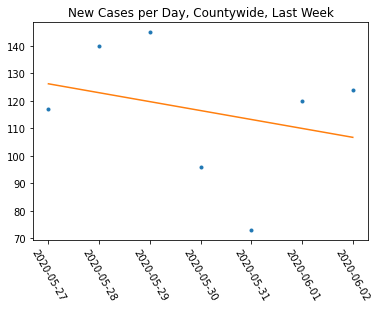

In [4]:
import matplotlib.pyplot as plt

sddiff = sddata.diff()

plt.plot(sddiff.index[-7::],sddiff['TOTAL'].iloc[-7:],'.',sddiff.index[-7::],P.polyval(np.arange(0,7),fit['TOTAL']),'-')
plt.title('New Cases per Day, Countywide, Last Week')
plt.xticks(rotation=-60)
print("Average increase in new cases per day: {:.2f}".format(fit['TOTAL'].c1))


Text(0.5, 1.0, 'histogram of c1')

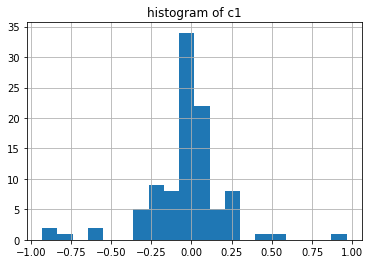

In [5]:

ax = fit.iloc[1,2:].transpose().hist(bins=20)
plt.title('histogram of c1')
#sddiff.iloc[-7:,:]
#plt.plot(x,y,'.',x,P.polyval(x,c[::-1]),'-')



Show zipcodes on a map and colorcode highest c1.

In [6]:
from jdcv19.gis.gis import ZipCodeGIS

gis = ZipCodeGIS(sddata.columns)
zipdf = gis.zipcode_coordinates

In [7]:
df = fit.transpose().join(zipdf)

bins = [-10,-.5,-.25,.25,.5,10]

df['bin'] = pd.cut(df.c1,bins,labels=['decreasing fastest','decreasing','about the same','increasing','increasing fastest'])
df[df.bin=='increasing fastest']

,c0,c1,city,latitude,longitude,bin
92025,-0.464286,0.964286,Escondido,33.106862,-117.07077,increasing fastest
92024,-0.607143,0.535714,Encinitas,33.053092,-117.26855,increasing fastest


In [8]:
colormap = {'decreasing fastest':'blue','decreasing':'green','about the same':'yellow','increasing':'orange','increasing fastest':'red'}
df = df.replace({"bin": colormap})
df = df.rename(columns={'bin': 'color'})
df.index.name = 'zip'
df['color'].to_frame()


,color
zip,
TOTAL,blue
92154,green
91911,orange
91950,green
91910,blue
...,...
92055,yellow
92061,yellow
92070,yellow


Make a map with zipcode centers colored by rate of increase.

In [9]:
from jdcv19.figures.figures import create_map
from bokeh.plotting import output_notebook
from bokeh.io import show

output_notebook()
f = create_map(gis,df['color'].to_frame())
show(f)



Loading BokehJS ...

Plot all zipcodes where c1>=.25.

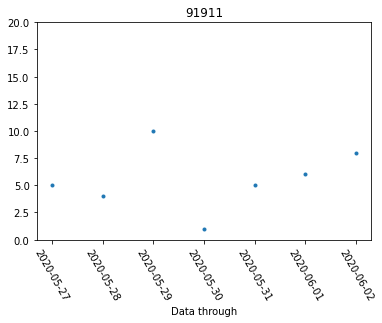

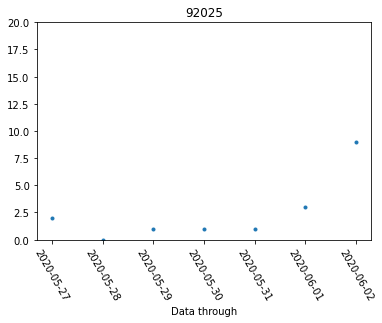

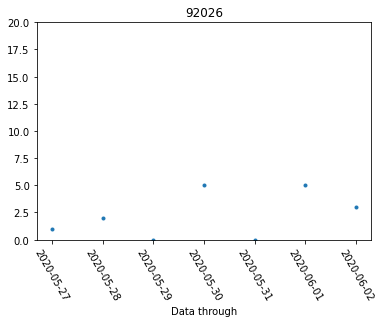

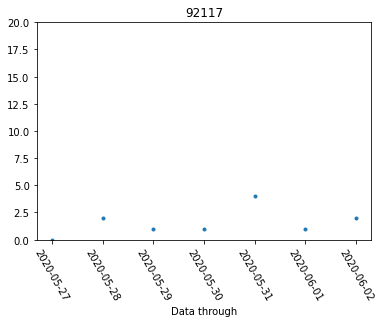

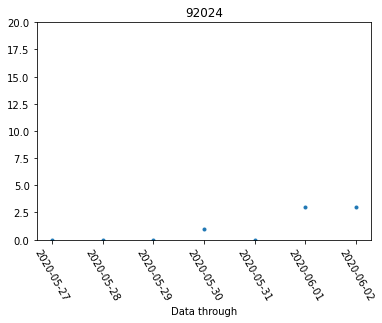

In [10]:
highc1zipcodes = df[df['c1']>=.25].index

for zc in highc1zipcodes:
    plt.figure()
    sddiff.loc[:,zc].iloc[-7:].plot(rot=-60,title=zc,style='.')
    plt.ylim(0,20)
